In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [47]:
df = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/df.csv')
lp_data21 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/living_pop2021.csv', encoding = 'cp949')
lp_data22 = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/living_pop2022.csv', encoding = 'utf-8')

In [48]:
df.drop(df.iloc[:,:1], axis = 1, inplace = True)
lp_data21.drop(lp_data21.iloc[:,:1], axis = 1, inplace = True)

In [49]:
lp_data21['21생활인구평균'] = lp_data21.iloc[:,1:].mean(axis=1)
lp_data22['22생활인구평균'] = lp_data22.iloc[:,1:].mean(axis=1)

lp21 = lp_data21[['행정구역','21생활인구평균']]
lp22 = lp_data22[['행정구역','22생활인구평균']]

df = pd.merge(df,lp21,how='inner',on='행정구역')
df = pd.merge(df,lp22,how='inner',on='행정구역')

In [50]:
df.head()

,행정구역,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,...,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,21생활인구평균,22생활인구평균
0,세종특별자치시,385346,160033,2.41,91936,80012,2.078651,2.127958,5.6,5.6,...,2.4,1.349437,1.375387,143798,150278,1.166472,1.28,1.12,1.526103e+07,1.595454e+07
1,춘천시,285858,134480,2.13,59062,55241,4.005485,4.050962,14.7,14.9,...,1.6,1.434279,1.434279,105579,108577,0.582734,0.90,0.90,1.457312e+07,1.474962e+07
2,원주시,359513,168985,2.13,72688,68342,3.218242,3.326723,13.6,15.0,...,1.8,1.418586,1.418586,143538,146861,0.663052,0.94,0.94,1.621271e+07,1.637370e+07
3,강릉시,209761,103273,2.03,36184,36844,6.254738,6.497871,12.5,12.4,...,2.1,1.716239,1.716239,89259,89894,0.387068,0.90,0.91,1.314027e+07,1.315172e+07
4,동해시,88723,43033,2.06,13779,13980,13.818288,14.257859,15.9,14.5,...,1.6,1.577945,1.577945,41536,42187,0.351716,1.10,0.99,4.936367e+06,4.731752e+06


In [51]:
df['인구만명당_2021_사업체수'] = df['인구만명당_2021_사업체수'] * df['2023년06월_거주자 인구수'] / 1000 #오류 수정

In [52]:
df.head()

,행정구역,2023년06월_거주자 인구수,2023년06월_세대수,2023년06월_세대당 인구,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),인구만명당_2020_사업체수,인구만명당_2021_사업체수,2020_인구천명당_의료기관병상수,2021_인구천명당_의료기관병상수,...,2022_인구천명당_사설학원수,인구만명당_2022_초등학교수,인구만명당_2023_초등학교수,2021_주택수,2022_주택수,지방소멸위험도,2021출산율,2022출산율,21생활인구평균,22생활인구평균
0,세종특별자치시,385346,160033,2.41,91936,80012,2.078651,820.0,5.6,5.6,...,2.4,1.349437,1.375387,143798,150278,1.166472,1.28,1.12,1.526103e+07,1.595454e+07
1,춘천시,285858,134480,2.13,59062,55241,4.005485,1158.0,14.7,14.9,...,1.6,1.434279,1.434279,105579,108577,0.582734,0.90,0.90,1.457312e+07,1.474962e+07
2,원주시,359513,168985,2.13,72688,68342,3.218242,1196.0,13.6,15.0,...,1.8,1.418586,1.418586,143538,146861,0.663052,0.94,0.94,1.621271e+07,1.637370e+07
3,강릉시,209761,103273,2.03,36184,36844,6.254738,1363.0,12.5,12.4,...,2.1,1.716239,1.716239,89259,89894,0.387068,0.90,0.91,1.314027e+07,1.315172e+07
4,동해시,88723,43033,2.06,13779,13980,13.818288,1265.0,15.9,14.5,...,1.6,1.577945,1.577945,41536,42187,0.351716,1.10,0.99,4.936367e+06,4.731752e+06


In [56]:
new_df = df[['행정구역','2023년06월_거주자 인구수','전입인구(2022.1~2023.5)', '전출인구(2022.1~2023.5)',
             '인구만명당_2021_사업체수','2021_인구천명당_의료기관병상수','2021_인구십만명당_문화기반시설수',
             '2022_인구천명당_사설학원수','인구만명당_2023_초등학교수','2022_주택수', '지방소멸위험도',
             '2022출산율']]

In [57]:
new_df['인구만명당_2021_사업체수'] = new_df['인구만명당_2021_사업체수'] * new_df['2023년06월_거주자 인구수'] / 10000
new_df['2021_인구천명당_의료기관병상수'] = new_df['2021_인구천명당_의료기관병상수'] * new_df['2023년06월_거주자 인구수'] / 1000
new_df['2021_인구십만명당_문화기반시설수'] = new_df['2021_인구십만명당_문화기반시설수'] * new_df['2023년06월_거주자 인구수'] /100000
new_df['2022_인구천명당_사설학원수'] = new_df['2022_인구천명당_사설학원수'] * new_df['2023년06월_거주자 인구수'] / 1000
new_df['인구만명당_2023_초등학교수'] = new_df['인구만명당_2023_초등학교수'] * new_df['2023년06월_거주자 인구수'] / 10000

new_df.rename(columns={'인구만명당_2021_사업체수' : '2021_사업체수',
                       '2021_인구천명당_의료기관병상수' : '2021_의료기관병상수',
                       '2021_인구십만명당_문화기반시설수' : '2021_문화기반시설수',
                       '2021_인구천명당_사설학원수' : '2021_사설학원수',
                       '인구만명당_2023_초등학교수' : '2023_초등학교수'}, inplace = True)

C:\Users\admin\AppData\Local\Temp\ipykernel_3460\846321816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['인구만명당_2021_사업체수'] = new_df['인구만명당_2021_사업체수'] * new_df['2023년06월_거주자 인구수'] / 10000
C:\Users\admin\AppData\Local\Temp\ipykernel_3460\846321816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['2021_인구천명당_의료기관병상수'] = new_df['2021_인구천명당_의료기관병상수'] * new_df['2023년06월_거주자 인구수'] / 1000
C:\Users\admin\AppData\Local\Temp\ipykernel_3460\846321816.py:3: SettingWithCopyWarning: 
A value is tr

C:\Users\admin\AppData\Local\Temp\ipykernel_3460\4106219064.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr())


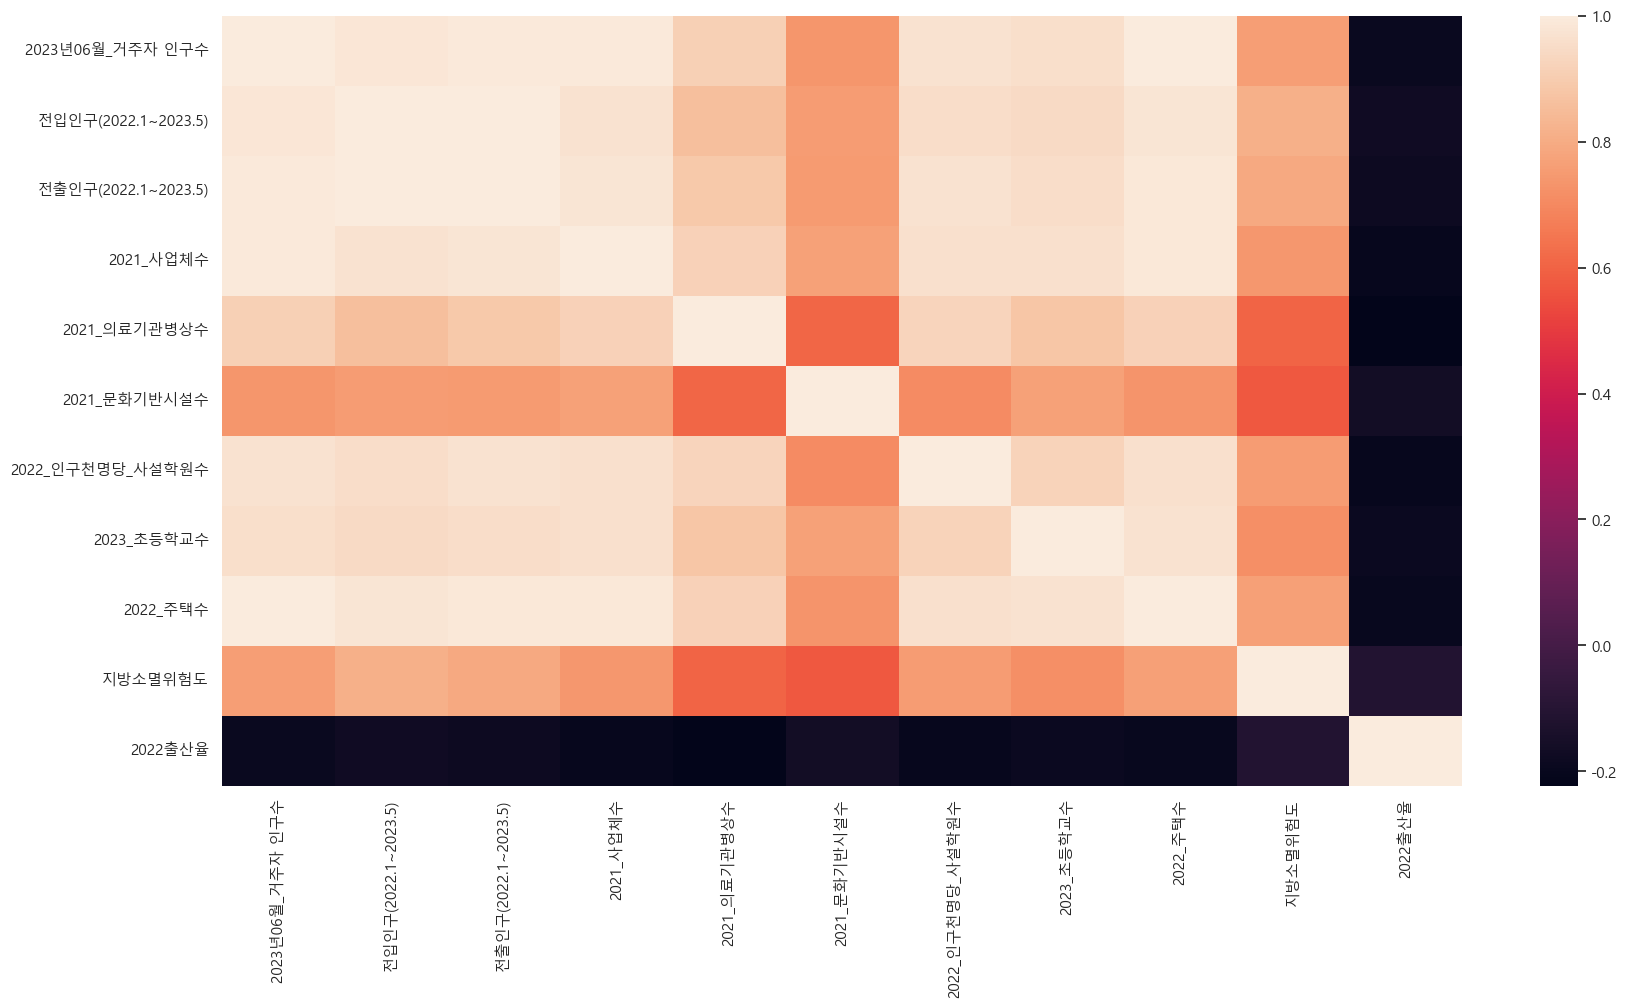

In [60]:
plt.figure(figsize=(20,10))

sns.heatmap(new_df.corr())

plt.show()

In [61]:
new_df.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_3460\4065070317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()


,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),2021_사업체수,2021_의료기관병상수,2021_문화기반시설수,2022_인구천명당_사설학원수,2023_초등학교수,2022_주택수,지방소멸위험도,2022출산율
2023년06월_거주자 인구수,1.000000,0.981463,0.991644,0.991889,0.913818,0.733810,0.970973,0.959683,0.997235,0.759975,-0.191524
전입인구(2022.1~2023.5),0.981463,1.000000,0.995747,0.967546,0.860503,0.753778,0.955373,0.944172,0.979726,0.813001,-0.172583
전출인구(2022.1~2023.5),0.991644,0.995747,1.000000,0.980196,0.888679,0.747352,0.971271,0.952630,0.989513,0.793466,-0.183974
2021_사업체수,0.991889,0.967546,0.980196,1.000000,0.917280,0.766745,0.961911,0.962326,0.990286,0.737475,-0.203477
2021_의료기관병상수,0.913818,0.860503,0.888679,0.917280,1.000000,0.605750,0.924371,0.876273,0.916429,0.599590,-0.223014
2021_문화기반시설수,0.733810,0.753778,0.747352,0.766745,0.605750,1.000000,0.706192,0.768577,0.729531,0.571492,-0.165331
2022_인구천명당_사설학원수,0.970973,0.955373,0.971271,0.961911,0.924371,0.706192,1.000000,0.923320,0.966212,0.752983,-0.199838
2023_초등학교수,0.959683,0.944172,0.952630,0.962326,0.876273,0.768577,0.923320,1.000000,0.967476,0.713510,-0.185229
2022_주택수,0.997235,0.979726,0.989513,0.990286,0.916429,0.729531,0.966212,0.967476,1.000000,0.762676,-0.197401
지방소멸위험도,0.759975,0.813001,0.793466,0.737475,0.599590,0.571492,0.752983,0.713510,0.762676,1.000000,-0.112297


In [104]:
mm_scaler = MinMaxScaler()

mm_scaler.fit(new_df.iloc[:,1:])

mm_new_df = mm_scaler.fit_transform(new_df.iloc[:,2:])

In [105]:
mm_new_df = pd.DataFrame(mm_new_df, columns=new_df.columns[2:])

In [106]:
mm_new_df = pd.concat([new_df[['행정구역','2023년06월_거주자 인구수']], mm_new_df], axis = 1)

In [107]:
mm_new_df

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),2021_사업체수,2021_의료기관병상수,2021_문화기반시설수,2022_인구천명당_사설학원수,2023_초등학교수,2022_주택수,지방소멸위험도,2022출산율
0,세종특별자치시,385346,0.601309,0.510384,0.271246,0.106248,0.334743,0.448245,0.453704,0.403931,1.000000,0.460317
1,춘천시,285858,0.382381,0.348962,0.284799,0.209709,0.428110,0.221457,0.342593,0.289548,0.455705,0.285714
2,원주시,359513,0.473125,0.434336,0.373974,0.265513,0.276131,0.313515,0.435185,0.394559,0.530595,0.317460
3,강릉시,209761,0.230023,0.229077,0.244139,0.128064,0.403936,0.213270,0.296296,0.238301,0.273260,0.293651
4,동해시,88723,0.080814,0.080082,0.087632,0.063341,0.057788,0.068432,0.092593,0.107444,0.240297,0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...
119,함양군,37172,0.017202,0.017249,0.028797,0.007687,0.011120,0.019399,0.083333,0.043566,0.051015,0.111111
120,거창군,60198,0.035136,0.032772,0.054571,0.040309,0.042189,0.040449,0.120370,0.066533,0.126772,0.238095
121,합천군,41455,0.020332,0.019406,0.034083,0.041230,0.040727,0.013640,0.120370,0.056348,0.011230,0.373016
122,제주시,489926,0.581637,0.564185,0.625795,0.221921,1.000000,0.451170,0.592593,0.479343,0.573480,0.309524


In [108]:
fi = [0.981463,0.991644,0.991889,0.913818,0.733810,0.970973,0.959683,0.997235,0.759975,-0.191524]

for i in range(len(fi)):
    mm_new_df.iloc[:,i+2] = mm_new_df.iloc[:,i+2] * fi[i] # 상관계수 * 스케일된 값 

In [109]:
mm_new_df['거주환경지수'] = mm_new_df.iloc[:,2:].sum(axis=1)

In [111]:
mm_new_df.sort_values(by = '거주환경지수')

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),2021_사업체수,2021_의료기관병상수,2021_문화기반시설수,2022_인구천명당_사설학원수,2023_초등학교수,2022_주택수,지방소멸위험도,2022출산율,거주환경지수
91,군위군,23139,0.010360,0.004672,0.016527,0.000416,0.032527,0.002844,0.026658,0.021984,0.000000,-0.144403,-0.028415
94,영양군,15829,0.000000,0.000000,0.002162,0.002208,0.008297,0.003302,0.017772,0.014440,0.018827,-0.024321,0.042688
93,청송군,24129,0.008229,0.006902,0.013493,0.014222,0.041917,0.005257,0.035544,0.026221,0.013390,-0.101842,0.063332
54,장수군,21083,0.003601,0.004336,0.014131,0.001707,0.030293,0.005533,0.035544,0.017996,0.036565,-0.069921,0.079785
103,울릉군,9043,0.004850,0.002456,0.000000,0.002889,0.010543,0.000000,0.000000,0.000000,0.098731,-0.015200,0.104267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,제주시,489926,0.570855,0.559471,0.620719,0.202796,0.733810,0.438074,0.568701,0.478018,0.435831,-0.059281,4.548992
30,천안시,656537,0.820941,0.814220,0.651507,0.443089,0.281330,0.649051,0.666447,0.671153,0.668715,-0.045601,5.620853
45,전주시,644410,0.722272,0.768656,0.654778,0.742237,0.391081,0.970973,0.630903,0.667001,0.437720,-0.028881,5.956739
19,청주시,847776,0.981463,0.951760,0.801990,0.480609,0.459069,0.718425,0.799736,0.852808,0.498050,-0.048641,6.495270


In [114]:
lp_df = pd.read_csv('C:/Users/admin/Desktop/공모전/nabis/데이터셋/lp_df4.csv', encoding = 'cp949')

In [116]:
mm_new_df = pd.merge(lp_df['행정구역'], mm_new_df, how = 'inner', on = '행정구역')

In [118]:
mm_new_df.sort_values(by = '거주환경지수')

,행정구역,2023년06월_거주자 인구수,전입인구(2022.1~2023.5),전출인구(2022.1~2023.5),2021_사업체수,2021_의료기관병상수,2021_문화기반시설수,2022_인구천명당_사설학원수,2023_초등학교수,2022_주택수,지방소멸위험도,2022출산율,거주환경지수
49,군위군,23139,0.010360,0.004672,0.016527,0.000416,0.032527,0.002844,0.026658,0.021984,0.000000,-0.144403,-0.028415
52,영양군,15829,0.000000,0.000000,0.002162,0.002208,0.008297,0.003302,0.017772,0.014440,0.018827,-0.024321,0.042688
51,청송군,24129,0.008229,0.006902,0.013493,0.014222,0.041917,0.005257,0.035544,0.026221,0.013390,-0.101842,0.063332
27,장수군,21083,0.003601,0.004336,0.014131,0.001707,0.030293,0.005533,0.035544,0.017996,0.036565,-0.069921,0.079785
60,울릉군,9043,0.004850,0.002456,0.000000,0.002889,0.010543,0.000000,0.000000,0.000000,0.098731,-0.015200,0.104267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,부여군,61549,0.031210,0.033597,0.056854,0.050123,0.083507,0.019870,0.177719,0.072443,0.038065,-0.031921,0.531468
2,홍천군,67448,0.050956,0.049345,0.069677,0.031864,0.053292,0.034524,0.177719,0.076172,0.094978,-0.072962,0.565565
48,문경시,69303,0.065688,0.065313,0.061864,0.048643,0.117885,0.038750,0.115517,0.075977,0.078192,-0.085122,0.582707
19,계룡시,45479,0.083062,0.067238,0.017616,0.013096,0.000000,0.027425,0.008886,0.042792,0.455599,-0.053201,0.662512
